In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
data_cols = ['bike_count','hour','temp','humidity','wind','visibility','dew_pt_temp','radiation','rain','snow','functional']
df = pd.read_csv("SeoulBikeData.csv").drop(['Date','Holiday','Seasons'], axis=1)

In [3]:
df

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Yes


In [4]:
df.columns = data_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"],axis =1)

In [5]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


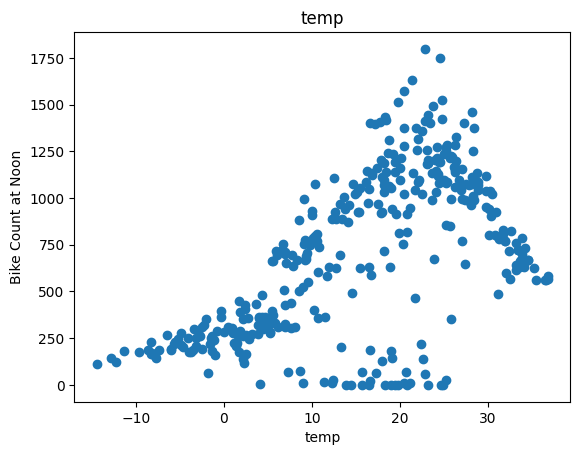

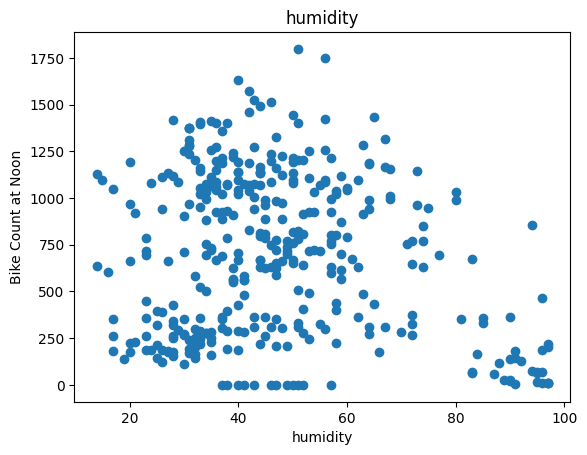

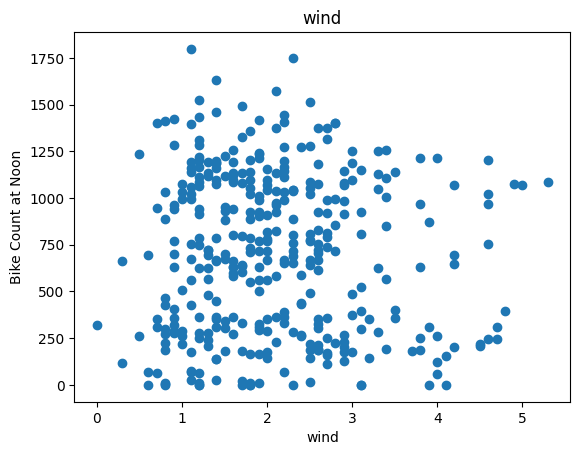

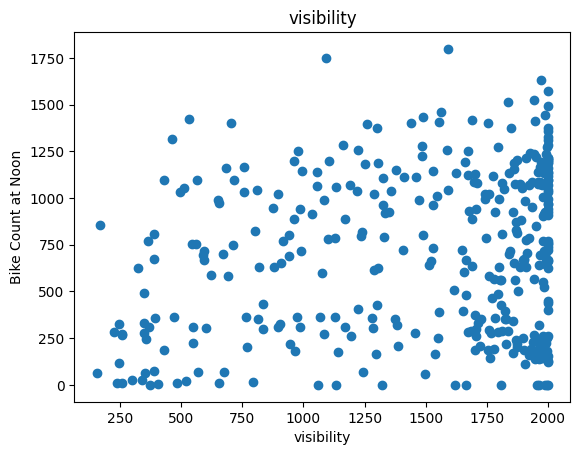

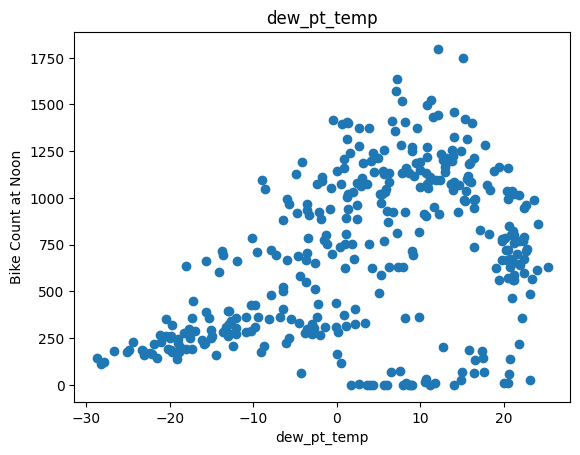

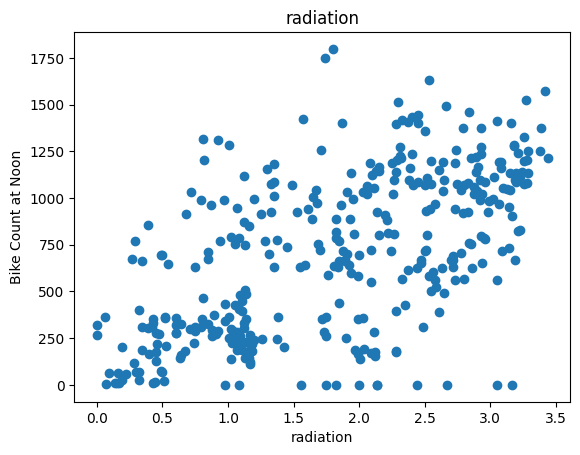

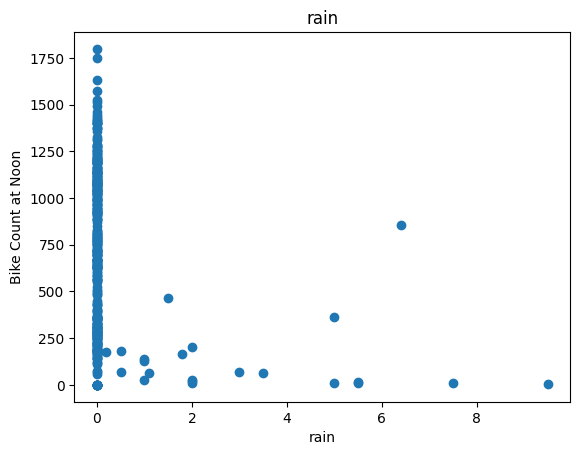

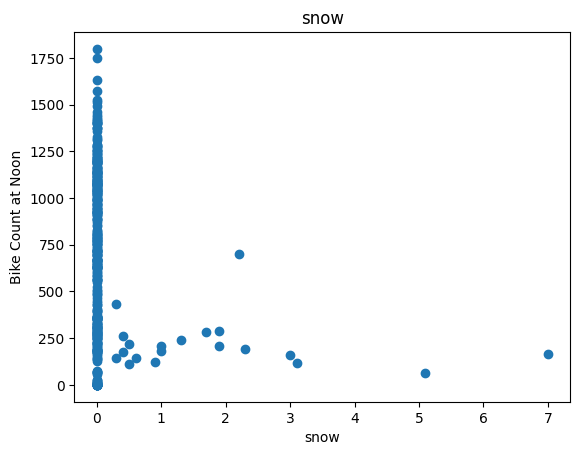

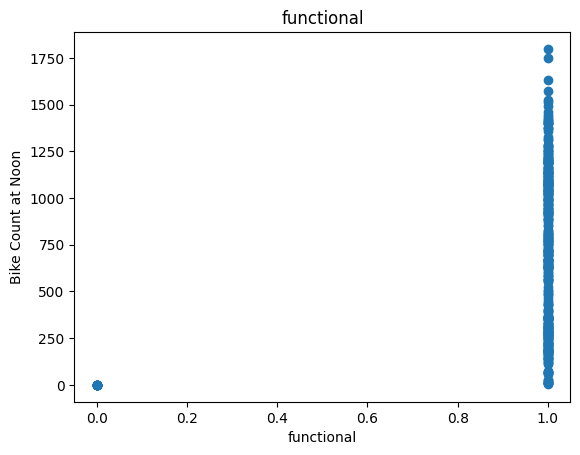

In [6]:
for label in df.columns[1:]:
  plt.scatter(df[label],df['bike_count'])
  plt.title(label)
  plt.ylabel('Bike Count at Noon')
  plt.xlabel(label)
  plt.show()


In [7]:
df= df.drop(['wind','visibility','functional'],axis=1)

In [8]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [9]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [10]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels)==1:
      X= dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X= dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))
  return data, X, y


In [11]:
_, X_train_temp,y_train_temp = get_xy(train, 'bike_count',x_labels=['temp'])
_, X_val_temp,y_val_temp = get_xy(val, 'bike_count',x_labels=['temp'])
_, X_test_temp,y_test_temp = get_xy(test, 'bike_count',x_labels=['temp'])

In [12]:
temp_reg = LinearRegression()
temp_reg = temp_reg.fit(X_train_temp,y_train_temp)

In [13]:
print(temp_reg.coef_,temp_reg.intercept_)

[[19.69042149]] [387.07856768]


In [14]:
temp_reg.score(X_test_temp,y_test_temp)

0.3978675189506371

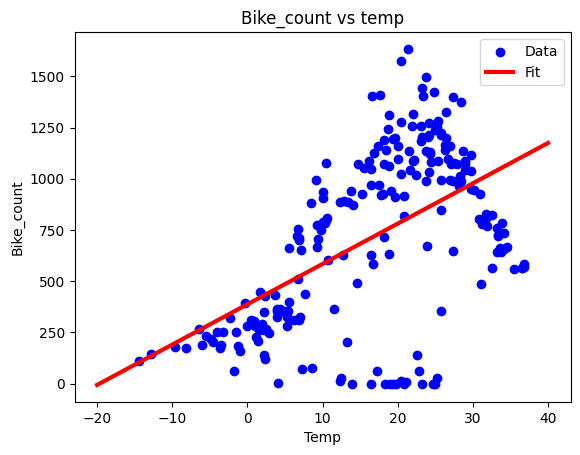

In [33]:
plt.scatter(X_train_temp,y_train_temp,label = "Data", color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bike_count vs temp")
plt.xlabel("Temp")
plt.ylabel("Bike_count")
plt.show()

Multiple Linear Regression

In [16]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [17]:
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all,y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all,y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [18]:
all_reg = LinearRegression()
all_reg = all_reg.fit(X_train_all,y_train_all)

In [19]:
print(all_reg.coef_,all_reg.intercept_)

[[-12.34488873 -14.33897307  36.06298614 113.06067158 -16.49716912
  -19.49482362]] [1274.37188618]


In [20]:
all_reg.score(X_test_all,y_test_all)

0.3893594985233838

In [52]:
y_pred_lr = all_reg.predict(X_test_all)

Regression With Neural Net

In [30]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [21]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [34]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [27]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss="mean_squared_error")

In [29]:
history = temp_nn_model.fit(X_train_temp.reshape(-1),y_train_temp,verbose =0,epochs=1000,validation_data=(X_val_temp,y_val_temp))

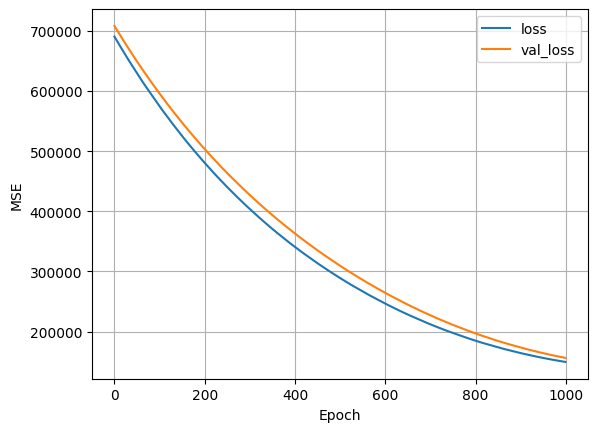

In [31]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


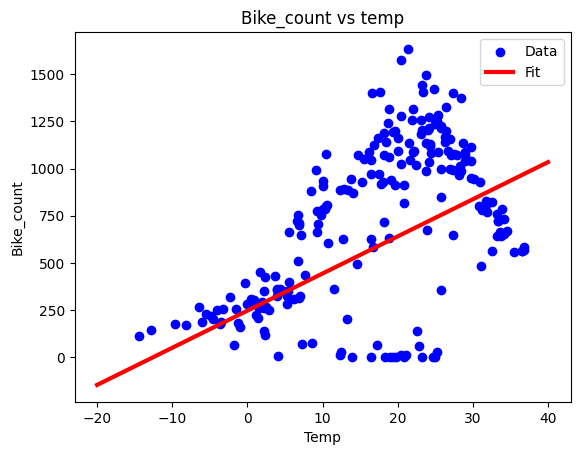

In [32]:
plt.scatter(X_train_temp,y_train_temp,label = "Data", color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bike_count vs temp")
plt.xlabel("Temp")
plt.ylabel("Bike_count")
plt.show()

Neural Net

In [39]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="relu")
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [41]:
history = nn_model.fit(X_train_temp,y_train_temp,verbose =0,epochs=100,validation_data=(X_val_temp,y_val_temp))

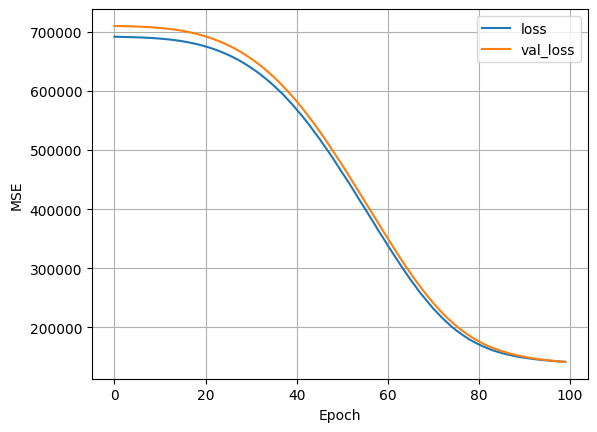

In [42]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


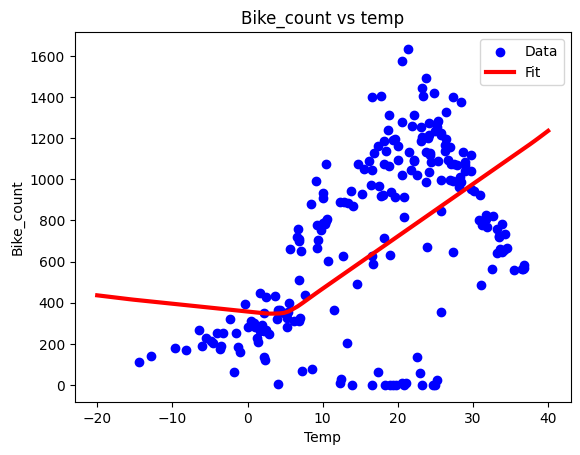

In [43]:
plt.scatter(X_train_temp,y_train_temp,label = "Data", color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bike_count vs temp")
plt.xlabel("Temp")
plt.ylabel("Bike_count")
plt.show()

In [58]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,),axis=-1)
all_normalizer.adapt(X_train_all)

In [59]:
mnn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="relu")
])
mnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [60]:
history = mnn_model.fit(X_train_all,y_train_all,verbose =0,epochs=100,validation_data=(X_val_all,y_val_all))

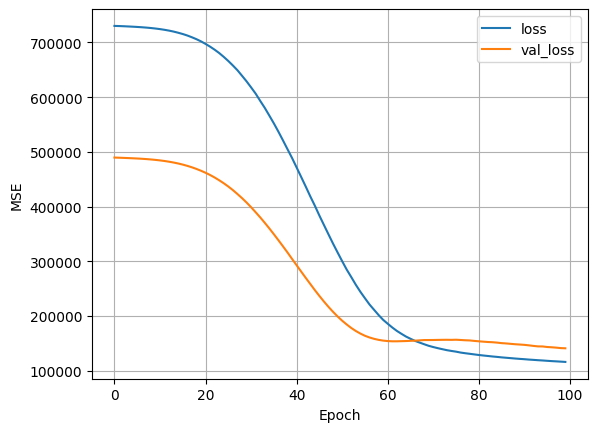

In [61]:
plot_loss(history)

In [62]:
y_pred_lr=all_reg.predict(X_test_all)
y_pred_nn=mnn_model.predict(X_test_all)

3/3 [==============================] - 0s 3ms/step


In [63]:
def MSE(y_pred,y_actual):
  return (np.square(y_pred-y_actual)).mean()

In [64]:
MSE(y_pred_lr,y_test_all)

107545.3361541679

In [65]:
MSE(y_pred_nn,y_test_all)

122452.63947536878

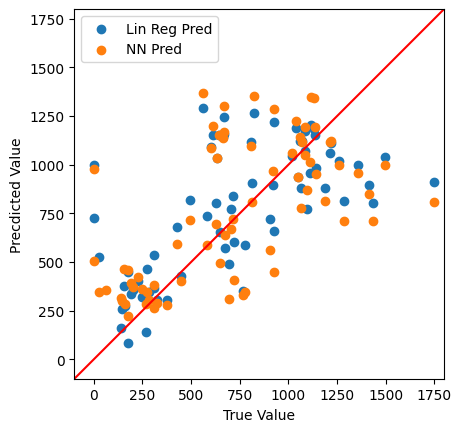

In [71]:
ax= plt.axes(aspect="equal")
plt.scatter(y_test_all,y_pred_lr,label="Lin Reg Pred")
plt.scatter(y_test_all,y_pred_nn,label="NN Pred")
plt.xlabel("True Value")
plt.ylabel("Precdicted Value")
lims =[-100,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_=plt.plot(lims,lims,c="red")